In [14]:
import json

In [15]:
with open("data/raw_data.json") as f:
    data = json.load(f)

for item in data:
    genres = []
    for genre in item["genres"].split(", "):
        genres.append(genre.lower().removesuffix(" game"))
    item["genres"] = genres

with open("data/data.json", 'w') as f:
    json.dump(data, f)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_json("data/raw_data.json")

In [3]:
df.head()

,name,developer,publisher,genres,operating_systems,release_date
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015"
1,A-Train,Artdink,".mw-parser-output .plainlist ol,.mw-parser-out...",Vehicle Simulation Game,"Windows, Mac",1985
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac","November 30, 1996"
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,"September 6, 1996"
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1070 non-null   object
 1   developer          1070 non-null   object
 2   publisher          1070 non-null   object
 3   genres             1070 non-null   object
 4   operating_systems  1070 non-null   object
 5   release_date       1070 non-null   object
dtypes: object(6)
memory usage: 50.3+ KB


In [5]:
df.release_date = pd.to_datetime(df.release_date, format="mixed", errors="coerce")
df.head()

,name,developer,publisher,genres,operating_systems,release_date
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,2015-06-24
1,A-Train,Artdink,".mw-parser-output .plainlist ol,.mw-parser-out...",Vehicle Simulation Game,"Windows, Mac",1985-01-01
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac",1996-11-30
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,1996-09-06
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996-01-01


In [6]:
all_genres = []
for genres in df.genres:
    for genre in np.array(genres.split(", ")):
        genre = genre.lower().removesuffix(" game")
        if genre != "":
            all_genres.append(genre)
all_genres

['adventure',
 'puzzle',
 'vehicle simulation',
 'flight simulator',
 'adventure',
 'educational',
 'educational',
 'action',
 'platform',
 'adventure',
 'platform',
 'action-adventure',
 'strategy',
 'fine art',
 'educational',
 'simulation',
 'action',
 'rhythm/music',
 'racing',
 'sports',
 'action',
 'real-time tactics',
 'racing',
 'first-person shooter',
 'third-person shooter',
 'action role-playing',
 'roguelike',
 'action-adventure',
 'adventure',
 'art',
 'simulation',
 'action role-playing',
 'fighting',
 'exploration',
 'combat flight simulator',
 'combat flight simulator',
 'action-adventure',
 'third-person shooter',
 'platform',
 'first-person shooter',
 'mmo',
 '3d space shooter',
 'graphic adventure (point-and-click)',
 'combat flight simulator',
 'rail shooter',
 'combat flight simulator',
 'real-time strategy',
 'real-time strategy',
 'wargame',
 'strategy',
 'computer wargaming',
 'word',
 'real-time strategy',
 'real-time strategy (rts)',
 'real-time strategy (rts)

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
def plot_majority(data, min_percent: float):
    data_label, data_count = np.unique(data, return_counts=True)

    result_count = []
    result_label = []

    total = np.sum(data_count)
    other = 0
    for i in reversed(np.argsort(data_count)):
        if data_count[i] < total * min_percent:
            other += data_count[i]
        else:
            result_count.append(data_count[i])
            result_label.append(data_label[i])
    if other > 0:
        result_count.append(other)
        result_label.append("Other")

    plot = plt.pie(result_count, labels=result_label, autopct="%1.1f%%", pctdistance=0.8)

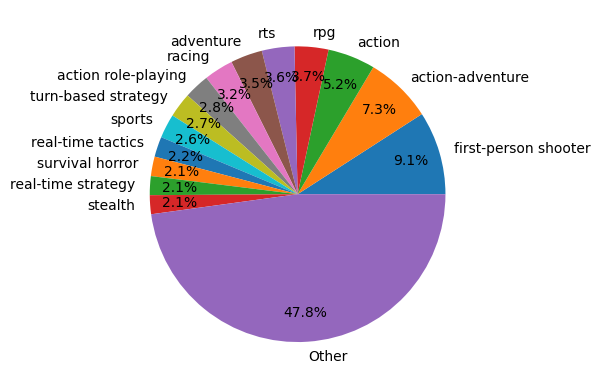

In [9]:
plot_majority(all_genres, 0.02)

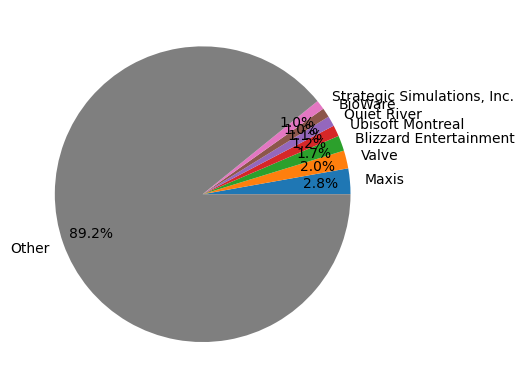

In [10]:
plot_majority(df.developer, 0.01)

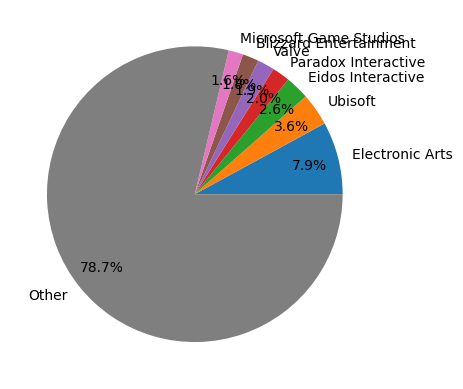

In [11]:
plot_majority(df.publisher, 0.015)

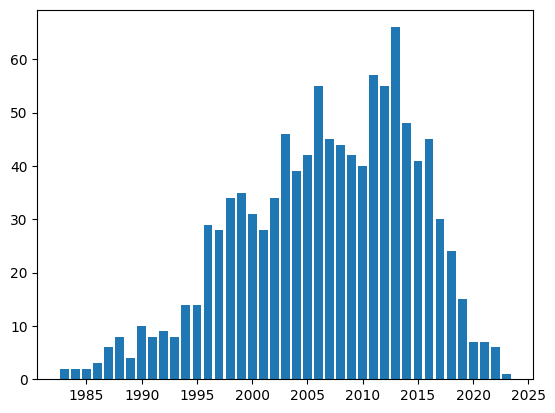

In [12]:
years = pd.DatetimeIndex(df.release_date).year
years = np.sort(years)
years, years_count = np.unique(years, return_counts=True)

p = plt.bar(years, years_count)

plt.show()